In [60]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [61]:
from pathlib import Path


In [62]:
from keras.preprocessing import image

In [63]:
p = Path("./traffic dataset/myData/")
dirs = p.glob("*")
    
image_data=[]
labels = []
cnt=0

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    cnt=0
    i=0
    
    for img_path in folder_dir.glob("*.jpg"):
        if i==390:
            break
            
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        
        label=int(label)
        
        labels.append(label)
        cnt += 1
        i+=1
        
    print(cnt)
    
    print(label)


390
0
390
1
390
10
390
11
390
12
390
13
390
14
390
15
390
16
390
17
390
18
390
19
390
2
390
20
390
21
390
22
390
23
390
24
390
25
390
26
390
27
390
28
390
29
390
3
390
30
390
31
390
32
390
33
390
34
390
35
390
36
390
37
390
38
390
39
390
4
390
40
390
41
390
42
390
5
390
6
390
7
390
8
390
9


In [64]:
import numpy as np

In [65]:
print(len(image_data))
print(len(labels))

16770
16770


In [66]:
import random
random.seed(10)

In [67]:
X = np.array(image_data)
Y = np.array(labels)

In [68]:
print(X.shape)

(16770, 40, 40, 3)


In [69]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalisation
X = X/255.0
print(X.shape)

(16770, 40, 40, 3)


In [70]:
from keras.utils import np_utils
print(Y)
print(type(Y[0]))



[ 2 24 24 ... 36 24 14]
<class 'numpy.int32'>


In [71]:
def drawImg(img,label):
    plt.title(label)
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

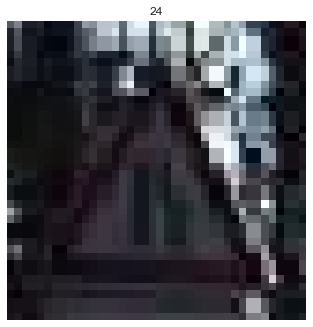

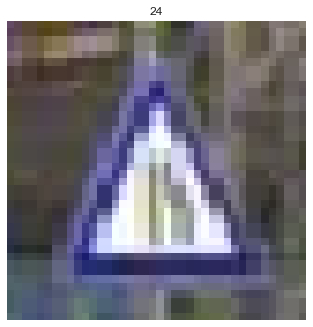

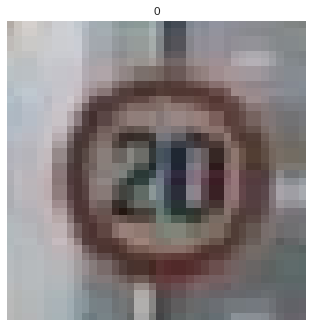

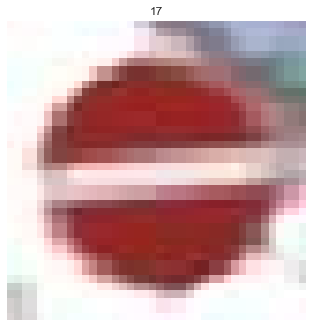

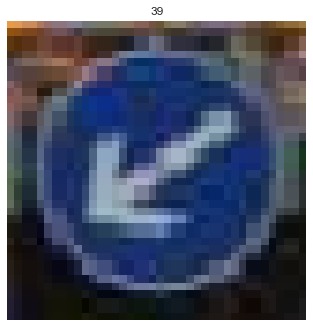

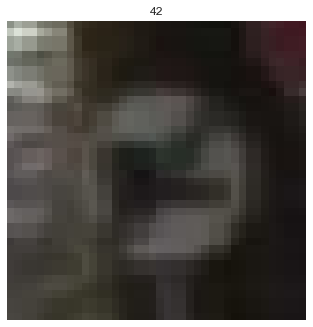

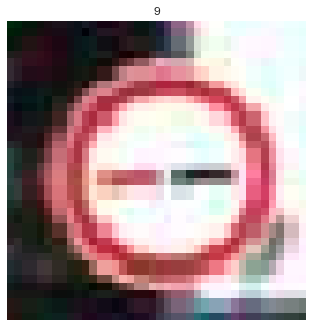

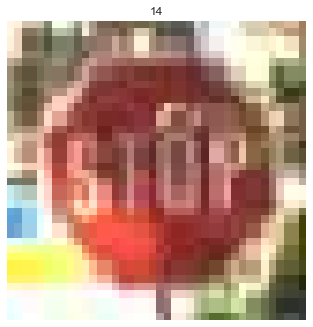

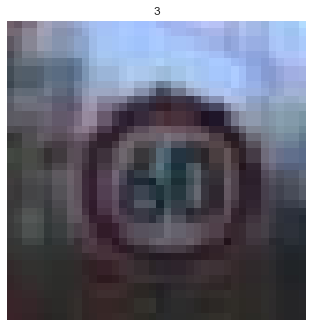

In [72]:
for i in range(1,10):
    drawImg(X[i].reshape(40,40,3),Y[i])  

In [73]:
from keras.utils import np_utils
from sklearn import model_selection
# split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

x_train,x_test,y_train,y_test=model_selection.train_test_split(X_,Y_)
print(x_train.shape[0])
print(y_train.shape[0])
print(x_train.shape[1:])
y1=y_train
y2=y_test


print(y_train)
print((y_test.shape))

12577
12577
(40, 40, 3)
[11 41 31 ... 21 31 37]
(4193,)


In [74]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [75]:
import keras
from keras.models import Sequential
from keras.layers import *
from keras.utils import *
import tensorflow

In [76]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(40,40,3)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))
model.summary()

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 36, 36, 32)        2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [77]:
hist = model.fit(x_train,y_train,epochs=15,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/15
40/40 [==============================] - 69s 2s/step - loss: 3.6842 - accuracy: 0.0441 - val_loss: 2.4904 - val_accuracy: 0.3994
Epoch 2/15
40/40 [==============================] - 63s 2s/step - loss: 2.3079 - accuracy: 0.3834 - val_loss: 0.9593 - val_accuracy: 0.7778
Epoch 3/15
40/40 [==============================] - 59s 1s/step - loss: 1.1552 - accuracy: 0.6666 - val_loss: 0.4021 - val_accuracy: 0.8911
Epoch 4/15
40/40 [==============================] - 65s 2s/step - loss: 0.6604 - accuracy: 0.8037 - val_loss: 0.2206 - val_accuracy: 0.9543
Epoch 5/15
40/40 [==============================] - 64s 2s/step - loss: 0.4179 - accuracy: 0.8712 - val_loss: 0.1384 - val_accuracy: 0.9722
Epoch 6/15
40/40 [==============================] - 64s 2s/step - loss: 0.2907 - accuracy: 0.9127 - val_loss: 0.0914 - val_accuracy: 0.9769
Epoch 7/15
40/40 [==============================] - 66s 2s/step - loss: 0.2373 - accuracy: 0.9256 - val_loss: 0.0600 - val_accuracy: 0.9869
Epoch 8/15
40/40 [==

In [78]:
model.save("my_model.h5")

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
pred = model.predict_classes(x_test)

c:\users\91999\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
print(type(pred[0]))

<class 'numpy.int64'>


In [ ]:
print(pred.shape)

In [83]:
def getAccuracy(X,Y,model):
    outputs = model.predict_classes(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(x_train,y1,model))
print("Test Acc %.4f"%getAccuracy(x_test,y2,model))

c:\users\91999\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train Acc 0.9987
Test Acc 0.9950


In [84]:
print(pred[:10])

[15 35  5 35 19 17 41 38 13  9]


In [87]:
print(y2[:10])

[15 35  5 35 19 17 41 38 13  9]
